# Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset
from sklearn.ensemble import RandomForestClassifier
import shap

# Data Preprocessing

In [2]:
# Load data
data = pd.read_csv("creditcard.csv")

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
# Class distribution
data['Class'].value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

In [7]:
# Check for missing values
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

## Splitting the Dataset

In [8]:
# Sort data based on Time
data_sorted = data.sort_values(by='Time')
split_point = int(len(data_sorted) * 0.7)
train_data = data_sorted.iloc[:split_point]
test_data = data_sorted.iloc[split_point:]

# Split data into training and test sets
X_train = train_data.drop('Class', axis=1)
y_train = train_data['Class']
X_test = test_data.drop('Class', axis=1)
y_test = test_data['Class']

## Data Normalization

In [9]:
# Normalize Time and Amount in the training set
scaler = StandardScaler()
X_train[['Time', 'Amount']] = scaler.fit_transform(X_train[['Time', 'Amount']])
X_test[['Time', 'Amount']] = scaler.fit_transform(X_test[['Time', 'Amount']])

In [10]:
# Verify the scaling
X_train[['Time', 'Amount']].describe()

,Time,Amount
count,1.993640e+05,1.993640e+05
mean,1.906418e-15,-3.994206e-15
std,1.000003e+00,1.000003e+00
min,-2.041695e+00,-3.606558e-01
25%,-7.595496e-01,-3.365910e-01
50%,-9.310568e-02,-2.682533e-01
75%,6.075745e-01,-4.198769e-02
max,1.810966e+00,7.860945e+01


In [11]:
# Verify the scaling
X_test[['Time', 'Amount']].describe()

,Time,Amount
count,8.544300e+04,8.544300e+04
mean,-5.608259e-15,3.554698e-15
std,1.000006e+00,1.000006e+00
min,-1.708213e+00,-3.362485e-01
25%,-8.561131e-01,-3.164768e-01
50%,-3.162355e-02,-2.571616e-01
75%,8.459913e-01,-5.086337e-02
max,1.924261e+00,1.012555e+02


In [12]:
# Verify the scaling
X_train.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,1.993640e+05,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,...,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,1.993640e+05
mean,1.906418e-15,-0.105411,0.003754,0.320783,0.075491,-0.112147,0.045975,-0.050588,0.017137,0.008822,...,0.019870,-0.014674,-0.047919,-0.015519,0.004285,0.060814,0.006248,0.001588,0.001916,-3.994206e-15
std,1.000003e+00,1.891043,1.621781,1.447531,1.399229,1.361533,1.311005,1.218068,1.209774,1.135743,...,0.749220,0.738184,0.691323,0.610755,0.603586,0.491248,0.488392,0.394051,0.313844,1.000003e+00
min,-2.041695e+00,-56.407510,-72.715728,-33.680984,-5.683171,-42.147898,-26.160506,-43.557242,-73.216718,-13.434066,...,-25.222345,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-11.710896,-3.606558e-01
25%,-7.595496e-01,-0.962291,-0.581510,-0.336367,-0.792650,-0.784262,-0.710519,-0.576456,-0.180954,-0.663900,...,-0.194220,-0.227103,-0.537661,-0.168573,-0.341725,-0.240214,-0.331146,-0.067411,-0.041606,-3.365910e-01
50%,-9.310568e-02,-0.092060,0.081545,0.492453,0.076332,-0.169569,-0.219188,-0.010263,0.043241,-0.073990,...,-0.044098,-0.042975,-0.035025,-0.028892,0.052733,0.103368,-0.060899,0.005966,0.018491,-2.682533e-01
75%,6.075745e-01,1.213894,0.783500,1.222798,0.886439,0.464850,0.444175,0.500768,0.338716,0.626407,...,0.150117,0.150726,0.423196,0.115063,0.421865,0.384386,0.261533,0.089145,0.078257,-4.198769e-02
max,1.810966e+00,2.454930,22.057729,9.382558,16.875344,34.801666,22.529298,36.677268,20.007208,15.594995,...,39.420904,27.202839,10.503090,19.002942,4.022866,7.519589,3.517346,12.152401,33.847808,7.860945e+01


In [13]:
# Verify the scaling
X_test.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,8.544300e+04,85443.000000,85443.000000,85443.000000,85443.000000,85443.000000,85443.000000,85443.000000,85443.000000,85443.000000,...,85443.000000,85443.000000,85443.000000,85443.000000,85443.000000,85443.000000,85443.000000,85443.000000,85443.000000,8.544300e+04
mean,-5.608259e-15,0.245956,-0.008760,-0.748482,-0.176142,0.261673,-0.107273,0.118037,-0.039986,-0.020585,...,-0.046363,0.034239,0.111809,0.036210,-0.009999,-0.141897,-0.014579,-0.003705,-0.004470,3.554698e-15
std,1.000006e+00,2.087537,1.718211,1.404982,1.438639,1.388165,1.374660,1.272597,1.156593,1.006441,...,0.817465,0.724763,0.788961,0.653898,0.610316,0.560284,0.467204,0.425130,0.365140,1.000006e+00
min,-1.708213e+00,-46.855047,-50.383269,-48.325589,-5.560118,-113.743307,-20.869626,-23.386192,-39.688571,-4.944054,...,-54.497720,-21.620120,-7.331078,-36.666000,-2.775670,-8.696627,-1.855355,-9.895244,-15.430084,-3.362485e-01
25%,-8.561131e-01,-0.807121,-0.642553,-1.602601,-0.957142,-0.428636,-0.890182,-0.488547,-0.268909,-0.585443,...,-0.245691,-0.232130,-0.553630,-0.138770,-0.380724,-0.451237,-0.303309,-0.075481,-0.062162,-3.164768e-01
50%,-3.162355e-02,0.104175,0.024616,-0.737852,-0.337782,0.252050,-0.411921,0.157193,-0.032565,-0.002560,...,-0.106516,0.025559,0.165693,0.043567,0.016670,-0.201837,-0.028312,-0.009453,-0.028483,-2.571616e-01
75%,8.459913e-01,1.980563,0.839933,0.111102,0.421387,0.874336,0.277230,0.745348,0.295944,0.551485,...,0.086177,0.249114,0.745290,0.230826,0.524888,0.216137,0.214618,0.097387,0.078361,-5.086337e-02
max,1.924261e+00,2.451888,12.730564,3.937048,15.304184,29.162172,73.301626,120.589494,10.713656,7.871113,...,23.643417,20.063786,8.272233,22.528412,4.584549,6.070850,3.415636,31.612198,15.942151,1.012555e+02


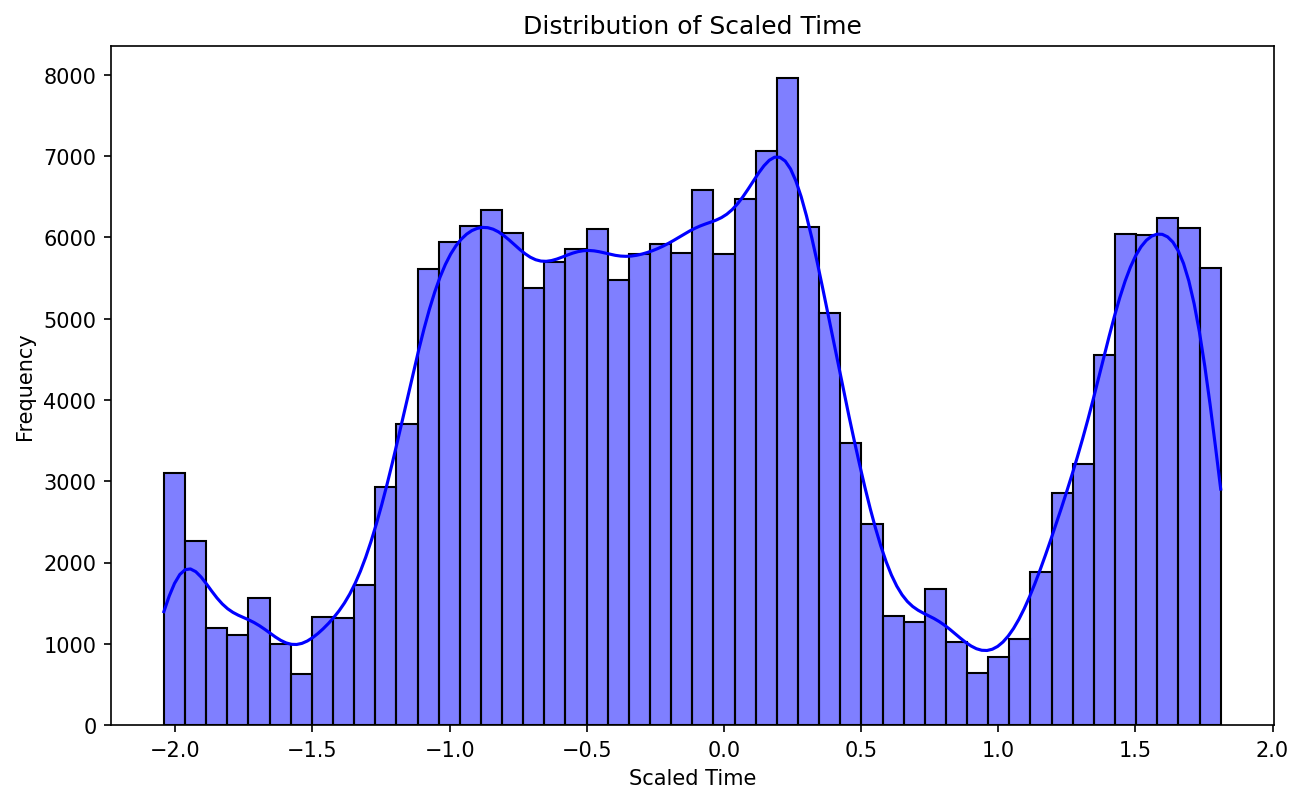

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for scaled 'Time'
plt.figure(figsize=(10, 6), dpi=150)

# Time feature
sns.histplot(X_train['Time'], bins=50, kde=True, color='blue')
plt.title('Distribution of Scaled Time')
plt.xlabel('Scaled Time')
plt.ylabel('Frequency')

plt.show()

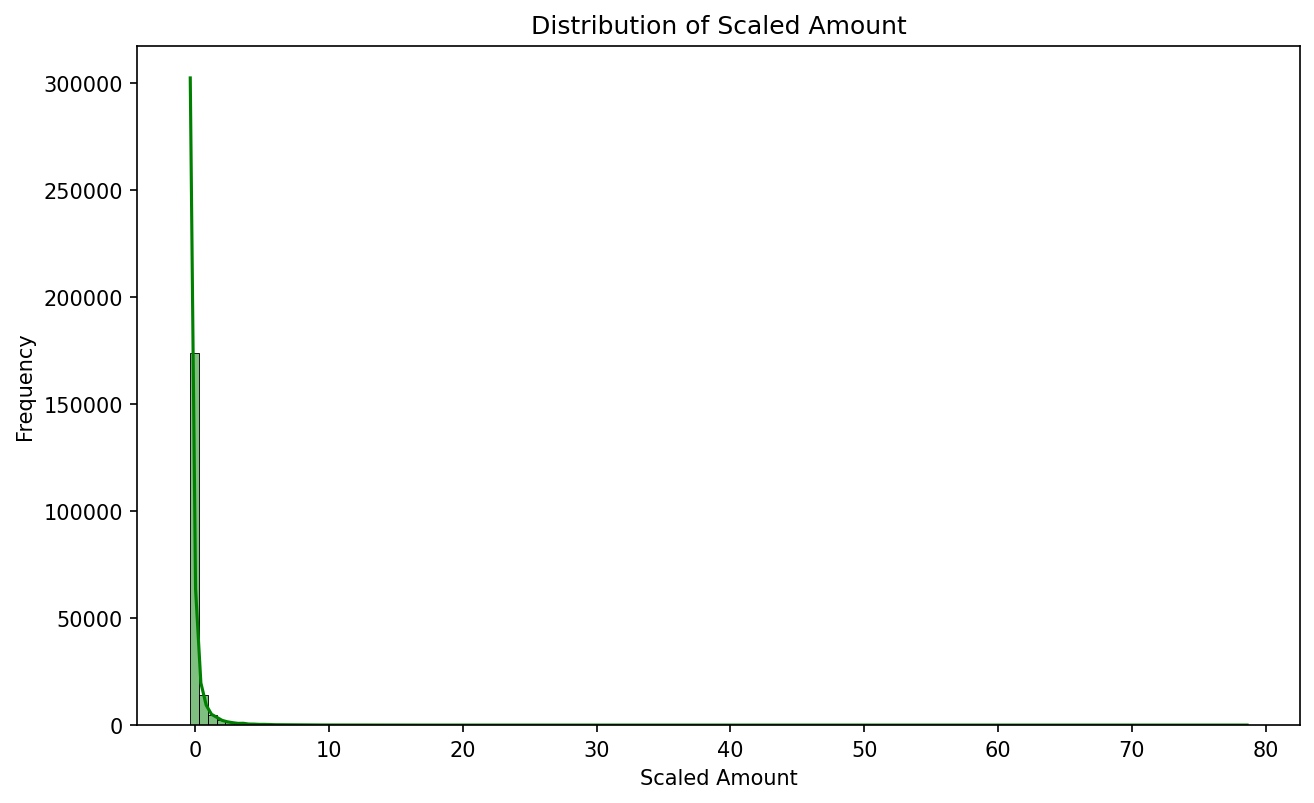

In [15]:
# Plot histograms for scaled 'Amount'
plt.figure(figsize=(10, 6), dpi=150)

# Amount feature
sns.histplot(X_train['Amount'], bins=120, kde=True, color='green')
plt.title('Distribution of Scaled Amount')
plt.xlabel('Scaled Amount')
plt.ylabel('Frequency')

plt.show()

In [16]:
# Apply SMOTE to the normalized training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check class distributions
print("Training set class distribution after SMOTE:")
print(y_train_resampled.value_counts())

print("\nTest set class distribution remains unchanged:")
print(y_test.value_counts())

Training set class distribution after SMOTE:
0    198980
1    198980
Name: Class, dtype: int64

Test set class distribution remains unchanged:
0    85335
1      108
Name: Class, dtype: int64


In [17]:
# Check for CUDA
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [18]:
# Convert data to PyTorch tensors and move to GPU
X_train_tensor = torch.tensor(X_train_resampled.values, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train_resampled.values, dtype=torch.float32).to(device)

X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).to(device)

# Create DataLoader for training data
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Logistic Regression Without SMOTE

In [19]:
# Convert data to PyTorch tensors and move to GPU
X_train_tensor_0 = torch.tensor(X_train.values, dtype=torch.float32).to(device)
y_train_tensor_0 = torch.tensor(y_train.values, dtype=torch.float32).to(device)

X_test_tensor_0 = torch.tensor(X_test.values, dtype=torch.float32).to(device)
y_test_tensor_0 = torch.tensor(y_test.values, dtype=torch.float32).to(device)

# Create DataLoader for training data
train_dataset_0 = TensorDataset(X_train_tensor_0, y_train_tensor_0)
train_loader_0 = DataLoader(train_dataset_0, batch_size=64, shuffle=True)

test_dataset_0 = TensorDataset(X_test_tensor_0, y_test_tensor_0)
test_loader_0 = DataLoader(test_dataset_0, batch_size=64, shuffle=False)

In [20]:
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, 1)
    
    def forward(self, x):
        return torch.sigmoid(self.linear(x))

In [21]:
# 模型定义
lr_model = LogisticRegressionModel(input_dim=X_train_tensor_0.shape[1]).to(device)
criterion = nn.BCELoss()
optimizer = optim.Adam(lr_model.parameters(), lr=0.001)

In [22]:
# 训练
epochs = 20
for epoch in range(epochs):
    lr_model.train()
    epoch_loss = 0
    for X_batch, y_batch in train_loader_0:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)  # 确保数据在 GPU
        optimizer.zero_grad()
        outputs = lr_model(X_batch).squeeze()
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss/len(train_loader):.4f}")

Epoch 1/20, Loss: 0.1288
Epoch 2/20, Loss: 0.0244
Epoch 3/20, Loss: 0.0075
Epoch 4/20, Loss: 0.0036
Epoch 5/20, Loss: 0.0027
Epoch 6/20, Loss: 0.0025
Epoch 7/20, Loss: 0.0024
Epoch 8/20, Loss: 0.0024
Epoch 9/20, Loss: 0.0023
Epoch 10/20, Loss: 0.0023
Epoch 11/20, Loss: 0.0023
Epoch 12/20, Loss: 0.0023
Epoch 13/20, Loss: 0.0023
Epoch 14/20, Loss: 0.0023
Epoch 15/20, Loss: 0.0023
Epoch 16/20, Loss: 0.0023
Epoch 17/20, Loss: 0.0023
Epoch 18/20, Loss: 0.0023
Epoch 19/20, Loss: 0.0022
Epoch 20/20, Loss: 0.0023


In [23]:
# 测试
lr_model.eval()
with torch.no_grad():
    predictions = []
    for X_batch, _ in test_loader_0:
        X_batch = X_batch.to(device)  # 确保测试数据在 GPU
        preds = lr_model(X_batch).squeeze().cpu().numpy()  # 将预测移回 CPU
        predictions.extend(preds)
predictions_binary = (np.array(predictions) > 0.5).astype(int)

# 评估
print("Logistic Regression Results:")
print(f"Accuracy: {accuracy_score(y_test, predictions_binary):.2f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions_binary))
print("Classification Report:")
print(classification_report(y_test, predictions_binary))
print("ROC AUC score:", roc_auc_score(y_test, predictions_binary))
print("F1 Score:", f1_score(y_test, predictions_binary))

Logistic Regression Results:
Accuracy: 1.00
Confusion Matrix:
[[85319    16]
 [   51    57]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85335
           1       0.78      0.53      0.63       108

    accuracy                           1.00     85443
   macro avg       0.89      0.76      0.81     85443
weighted avg       1.00      1.00      1.00     85443

ROC AUC score: 0.7637951407199077
F1 Score: 0.6298342541436465


# Logistic Regression

In [24]:
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, 1)
    
    def forward(self, x):
        return torch.sigmoid(self.linear(x))

In [25]:
# 模型定义
lr_model = LogisticRegressionModel(input_dim=X_train_tensor.shape[1]).to(device)
criterion = nn.BCELoss()
optimizer = optim.Adam(lr_model.parameters(), lr=0.001)

In [26]:
# 训练
epochs = 20
for epoch in range(epochs):
    lr_model.train()
    epoch_loss = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)  # 确保数据在 GPU
        optimizer.zero_grad()
        outputs = lr_model(X_batch).squeeze()
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss/len(train_loader):.4f}")

Epoch 1/20, Loss: 0.1839
Epoch 2/20, Loss: 0.1356
Epoch 3/20, Loss: 0.1344
Epoch 4/20, Loss: 0.1357
Epoch 5/20, Loss: 0.1354
Epoch 6/20, Loss: 0.1358
Epoch 7/20, Loss: 0.1356
Epoch 8/20, Loss: 0.1368
Epoch 9/20, Loss: 0.1371
Epoch 10/20, Loss: 0.1370
Epoch 11/20, Loss: 0.1373
Epoch 12/20, Loss: 0.1367
Epoch 13/20, Loss: 0.1366
Epoch 14/20, Loss: 0.1367
Epoch 15/20, Loss: 0.1365
Epoch 16/20, Loss: 0.1369
Epoch 17/20, Loss: 0.1370
Epoch 18/20, Loss: 0.1372
Epoch 19/20, Loss: 0.1371
Epoch 20/20, Loss: 0.1373


In [27]:
# 测试
lr_model.eval()
with torch.no_grad():
    predictions = []
    for X_batch, _ in test_loader:
        X_batch = X_batch.to(device)  # 确保测试数据在 GPU
        preds = lr_model(X_batch).squeeze().cpu().numpy()  # 将预测移回 CPU
        predictions.extend(preds)
predictions_binary = (np.array(predictions) > 0.5).astype(int)

# 评估
print("Logistic Regression Results:")
print(f"Accuracy: {accuracy_score(y_test, predictions_binary):.2f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions_binary))
print("Classification Report:")
print(classification_report(y_test, predictions_binary))
print("ROC AUC score:", roc_auc_score(y_test, predictions_binary))
print("F1 Score:", f1_score(y_test, predictions_binary))

Logistic Regression Results:
Accuracy: 0.97
Confusion Matrix:
[[82490  2845]
 [   12    96]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     85335
           1       0.03      0.89      0.06       108

    accuracy                           0.97     85443
   macro avg       0.52      0.93      0.52     85443
weighted avg       1.00      0.97      0.98     85443

ROC AUC score: 0.9277748481474971
F1 Score: 0.06297146605444408


# Random Forest

In [28]:
# Random Forest
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train_resampled, y_train_resampled)
rf_predictions = rf_model.predict(X_test)

In [29]:
# Evaluation
print("Random Forest Results:")
print(f"Accuracy: {accuracy_score(y_test, rf_predictions):.2f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, rf_predictions))
print("Classification Report:")
print(classification_report(y_test, rf_predictions))
print("ROC AUC score:", roc_auc_score(y_test, rf_predictions))
print("F1 Score:", f1_score(y_test, rf_predictions))

Random Forest Results:
Accuracy: 1.00
Confusion Matrix:
[[85331     4]
 [   26    82]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85335
           1       0.95      0.76      0.85       108

    accuracy                           1.00     85443
   macro avg       0.98      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443

ROC AUC score: 0.8796061925873844
F1 Score: 0.845360824742268


# LSTM

In [30]:
class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, 1)
    
    def forward(self, x):
        _, (hn, _) = self.lstm(x)
        out = self.fc(hn[-1])  # 使用最后一层隐藏状态
        return torch.sigmoid(out)

In [31]:
# 数据转换为适合 LSTM 的输入 (batch_size, seq_len, input_dim)
X_train_lstm = X_train_tensor.unsqueeze(1)  # 添加序列维度
X_test_lstm = X_test_tensor.unsqueeze(1)

train_dataset_lstm = TensorDataset(X_train_lstm, y_train_tensor)
test_dataset_lstm = TensorDataset(X_test_lstm, y_test_tensor)

train_loader_lstm = DataLoader(train_dataset_lstm, batch_size=64, shuffle=True)
test_loader_lstm = DataLoader(test_dataset_lstm, batch_size=64, shuffle=False)

In [32]:
# 模型定义和移动到 GPU
lstm_model = LSTMModel(input_dim=X_train_lstm.shape[2], hidden_dim=64, num_layers=2).to(device)
criterion = nn.BCELoss()
optimizer = optim.Adam(lstm_model.parameters(), lr=0.001)

In [33]:
# 训练
epochs = 20
for epoch in range(epochs):
    lstm_model.train()
    epoch_loss = 0
    for X_batch, y_batch in train_loader_lstm:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)  # 确保数据在 GPU
        optimizer.zero_grad()
        outputs = lstm_model(X_batch).squeeze()
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss/len(train_loader_lstm):.4f}")

Epoch 1/20, Loss: 0.0257
Epoch 2/20, Loss: 0.0042
Epoch 3/20, Loss: 0.0028
Epoch 4/20, Loss: 0.0022
Epoch 5/20, Loss: 0.0017
Epoch 6/20, Loss: 0.0015
Epoch 7/20, Loss: 0.0012
Epoch 8/20, Loss: 0.0011
Epoch 9/20, Loss: 0.0009
Epoch 10/20, Loss: 0.0009
Epoch 11/20, Loss: 0.0008
Epoch 12/20, Loss: 0.0008
Epoch 13/20, Loss: 0.0007
Epoch 14/20, Loss: 0.0007
Epoch 15/20, Loss: 0.0007
Epoch 16/20, Loss: 0.0007
Epoch 17/20, Loss: 0.0006
Epoch 18/20, Loss: 0.0005
Epoch 19/20, Loss: 0.0005
Epoch 20/20, Loss: 0.0006


In [34]:
# 测试
lstm_model.eval()
with torch.no_grad():
    predictions = []
    for X_batch, _ in test_loader_lstm:
        X_batch = X_batch.to(device)  # 确保测试数据在 GPU
        preds = lstm_model(X_batch).squeeze().cpu().numpy()  # 将预测移回 CPU
        predictions.extend(preds)
predictions_binary = (np.array(predictions) > 0.5).astype(int)

# 评估
print("LSTM Results:")
print(f"Accuracy: {accuracy_score(y_test, predictions_binary):.2f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions_binary))
print("Classification Report:")
print(classification_report(y_test, predictions_binary))
print("ROC AUC score:", roc_auc_score(y_test, predictions_binary))
print("F1 Score:", f1_score(y_test, predictions_binary))

LSTM Results:
Accuracy: 1.00
Confusion Matrix:
[[85294    41]
 [   24    84]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85335
           1       0.67      0.78      0.72       108

    accuracy                           1.00     85443
   macro avg       0.84      0.89      0.86     85443
weighted avg       1.00      1.00      1.00     85443

ROC AUC score: 0.8886486592058749
F1 Score: 0.721030042918455


# Multi-layer Perceptron

In [35]:
class MLPModel(nn.Module):
    def __init__(self, input_dim):
        super(MLPModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 1)
        self.dropout = nn.Dropout(0.3)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        x = torch.sigmoid(self.fc3(x))
        return x

In [36]:
# 模型定义和移动到 GPU
mlp_model = MLPModel(input_dim=X_train_tensor.shape[1]).to(device)
criterion = nn.BCELoss()
optimizer = optim.Adam(mlp_model.parameters(), lr=0.001)

In [37]:
# 训练
epochs = 20
for epoch in range(epochs):
    mlp_model.train()
    epoch_loss = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)  # 确保数据在 GPU
        optimizer.zero_grad()
        outputs = mlp_model(X_batch).squeeze()
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss/len(train_loader):.4f}")

Epoch 1/20, Loss: 0.0381
Epoch 2/20, Loss: 0.0221
Epoch 3/20, Loss: 0.0195
Epoch 4/20, Loss: 0.0189
Epoch 5/20, Loss: 0.0169
Epoch 6/20, Loss: 0.0185
Epoch 7/20, Loss: 0.0190
Epoch 8/20, Loss: 0.0144
Epoch 9/20, Loss: 0.0138
Epoch 10/20, Loss: 0.0128
Epoch 11/20, Loss: 0.0136
Epoch 12/20, Loss: 0.0138
Epoch 13/20, Loss: 0.0124
Epoch 14/20, Loss: 0.0121
Epoch 15/20, Loss: 0.0122
Epoch 16/20, Loss: 0.0120
Epoch 17/20, Loss: 0.0113
Epoch 18/20, Loss: 0.0112
Epoch 19/20, Loss: 0.0113
Epoch 20/20, Loss: 0.0109


In [38]:
# 测试
mlp_model.eval()
with torch.no_grad():
    predictions = []
    for X_batch, _ in test_loader:
        X_batch = X_batch.to(device)  # 确保测试数据在 GPU
        preds = mlp_model(X_batch).squeeze().cpu().numpy()  # 将预测移回 CPU
        predictions.extend(preds)
predictions_binary = (np.array(predictions) > 0.5).astype(int)

# 评估
print("MLP Results:")
print(f"Accuracy: {accuracy_score(y_test, predictions_binary):.2f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions_binary))
print("Classification Report:")
print(classification_report(y_test, predictions_binary))
print("ROC AUC score:", roc_auc_score(y_test, predictions_binary))
print("F1 Score:", f1_score(y_test, predictions_binary))

MLP Results:
Accuracy: 1.00
Confusion Matrix:
[[85301    34]
 [   26    82]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85335
           1       0.71      0.76      0.73       108

    accuracy                           1.00     85443
   macro avg       0.85      0.88      0.87     85443
weighted avg       1.00      1.00      1.00     85443

ROC AUC score: 0.8794304147705448
F1 Score: 0.7321428571428572


# LSTM With Focal Loss

In [39]:
class FocalLoss(nn.Module):
    def __init__(self, alpha=0.5, gamma=1, reduction='mean'):
        """
        Simplified Focal Loss.
        alpha: Weighting factor for the two classes.
        gamma: Focusing parameter.
        reduction: How to reduce the loss ('mean', 'sum', or 'none').
        """
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.reduction = reduction

    def forward(self, probs, targets):
        """
        probs: Predicted probabilities (already passed through sigmoid).
        targets: Ground truth labels (0 or 1).
        """
        # Binary Cross-Entropy Loss without reduction
        bce_loss = nn.functional.binary_cross_entropy(probs, targets, reduction='none')  # Shape: (batch_size,)
        pt = targets * probs + (1 - targets) * (1 - probs)  # True class probabilities
        focal_factor = (1 - pt) ** self.gamma  # Focal scaling factor
        loss = self.alpha * focal_factor * bce_loss

        # Reduction
        if self.reduction == 'mean':
            return loss.mean()
        elif self.reduction == 'sum':
            return loss.sum()
        else:
            return loss

In [40]:
class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, 1)
        self.sigmoid = nn.Sigmoid()  # Sigmoid activation for binary classification
    
    def forward(self, x):
        _, (hn, _) = self.lstm(x)  # hn is the hidden state from the last layer
        logits = self.fc(hn[-1])  # Fully connected layer with the last hidden state
        probs = self.sigmoid(logits)  # Apply sigmoid to get probabilities
        return probs

In [41]:
# 数据转换为适合 LSTM 的输入 (batch_size, seq_len, input_dim)
X_train_lstm = X_train_tensor.unsqueeze(1)  # Add sequence dimension
X_test_lstm = X_test_tensor.unsqueeze(1)

train_dataset_lstm = TensorDataset(X_train_lstm, y_train_tensor)
test_dataset_lstm = TensorDataset(X_test_lstm, y_test_tensor)

train_loader_lstm = DataLoader(train_dataset_lstm, batch_size=64, shuffle=True)
test_loader_lstm = DataLoader(test_dataset_lstm, batch_size=64, shuffle=False)

In [42]:
# 模型定义和移动到 GPU
lstm_model = LSTMModel(input_dim=X_train_lstm.shape[2], hidden_dim=64, num_layers=2).to(device)
criterion = FocalLoss(alpha=0.5, gamma=5, reduction='mean')  # 使用 Focal Loss
optimizer = optim.Adam(lstm_model.parameters(), lr=0.001)

In [43]:
# 训练
epochs = 20
for epoch in range(epochs):
    lstm_model.train()
    epoch_loss = 0
    for X_batch, y_batch in train_loader_lstm:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        probs = lstm_model(X_batch).squeeze()  # Predicted probabilities
        loss = criterion(probs, y_batch)  # Focal Loss
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss/len(train_loader_lstm):.4f}")

Epoch 1/20, Loss: 0.0005
Epoch 2/20, Loss: 0.0001
Epoch 3/20, Loss: 0.0001
Epoch 4/20, Loss: 0.0001
Epoch 5/20, Loss: 0.0001
Epoch 6/20, Loss: 0.0000
Epoch 7/20, Loss: 0.0000
Epoch 8/20, Loss: 0.0000
Epoch 9/20, Loss: 0.0000
Epoch 10/20, Loss: 0.0000
Epoch 11/20, Loss: 0.0000
Epoch 12/20, Loss: 0.0000
Epoch 13/20, Loss: 0.0000
Epoch 14/20, Loss: 0.0000
Epoch 15/20, Loss: 0.0000
Epoch 16/20, Loss: 0.0000
Epoch 17/20, Loss: 0.0000
Epoch 18/20, Loss: 0.0000
Epoch 19/20, Loss: 0.0000
Epoch 20/20, Loss: 0.0000


In [44]:
# 测试
lstm_model.eval()
with torch.no_grad():
    predictions = []
    for X_batch, _ in test_loader_lstm:
        X_batch = X_batch.to(device)
        probs = lstm_model(X_batch).squeeze()  # Predicted probabilities
        predictions.extend(probs.cpu().numpy())  # Convert to numpy array

predictions_binary = (np.array(predictions) > 0.5).astype(int)  # Convert probabilities to binary labels

# 评估
print("LSTM Results:")
print(f"Accuracy: {accuracy_score(y_test, predictions_binary):.2f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions_binary))
print("Classification Report:")
print(classification_report(y_test, predictions_binary))
print("ROC AUC score:", roc_auc_score(y_test, predictions_binary))
print("F1 Score:", f1_score(y_test, predictions_binary))

LSTM Results:
Accuracy: 1.00
Confusion Matrix:
[[85290    45]
 [   28    80]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85335
           1       0.64      0.74      0.69       108

    accuracy                           1.00     85443
   macro avg       0.82      0.87      0.84     85443
weighted avg       1.00      1.00      1.00     85443

ROC AUC score: 0.870106703645111
F1 Score: 0.6866952789699571


# Transformer

In [45]:
# Define Transformer-Based Model
class Transformer(nn.Module):
    def __init__(self, input_dim, num_heads=8, num_layers=2):
        super(Transformer, self).__init__()
        self.embedding = nn.Linear(input_dim, 128)  # Embedding layer
        self.transformer_encoder_layer = nn.TransformerEncoderLayer(d_model=128, nhead=num_heads)
        self.transformer_encoder = nn.TransformerEncoder(self.transformer_encoder_layer, num_layers=num_layers)
        self.fc = nn.Sequential(
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 1),
            nn.Sigmoid()  # For binary classification
        )

    def forward(self, x):
        x = self.embedding(x)  # Embed input
        x = self.transformer_encoder(x.unsqueeze(1))  # Add sequence dimension
        x = x.mean(dim=1)  # Mean pooling across the sequence dimension
        x = self.fc(x)  # Final prediction
        return x

# class OptimizedTransformer(nn.Module):
#     def __init__(self, input_dim, d_model=256, num_heads=8, num_layers=4, dropout=0.2):
#         super(OptimizedTransformer, self).__init__()
#         self.embedding = nn.Linear(input_dim, d_model)
#         self.embedding_dropout = nn.Dropout(p=dropout)  # Dropout after embedding
#         self.transformer_encoder_layer = nn.TransformerEncoderLayer(d_model=d_model, nhead=num_heads, dropout=dropout)
#         self.transformer_encoder = nn.TransformerEncoder(self.transformer_encoder_layer, num_layers=num_layers)
#         self.fc = nn.Sequential(
#             nn.Linear(d_model, 128),
#             nn.ReLU(),
#             nn.Dropout(dropout),
#             nn.Linear(128, 1),
#             nn.Sigmoid()
#         )

#     def forward(self, x):
#         x = self.embedding(x)  # Linear embedding
#         x = self.embedding_dropout(x)  # Apply dropout
#         x = self.transformer_encoder(x.unsqueeze(1))  # Add sequence dimension and pass through Transformer
#         x = x.mean(dim=1)  # Mean pooling across the sequence dimension
#         x = self.fc(x)  # Fully connected layers for final prediction
#         return x

In [46]:
model = Transformer(input_dim=X_train_tensor.shape[1]).to(device)
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

/usr3/graduate/shenfy/.local/lib/python3.10/site-packages/torch/nn/modules/transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


In [47]:
# 4. Training Loop
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        # Forward pass
        optimizer.zero_grad()
        predictions = model(X_batch).squeeze()
        loss = criterion(predictions, y_batch)

        # Backward pass
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {epoch_loss / len(train_loader):.4f}")

Epoch 1/20, Loss: 0.0300
Epoch 2/20, Loss: 0.0319
Epoch 3/20, Loss: 0.0168
Epoch 4/20, Loss: 0.0105
Epoch 5/20, Loss: 0.0113
Epoch 6/20, Loss: 0.0275
Epoch 7/20, Loss: 0.0097
Epoch 8/20, Loss: 0.0112
Epoch 9/20, Loss: 0.0089
Epoch 10/20, Loss: 0.0113
Epoch 11/20, Loss: 0.0081
Epoch 12/20, Loss: 0.0091
Epoch 13/20, Loss: 0.0105
Epoch 14/20, Loss: 0.0087
Epoch 15/20, Loss: 0.0071
Epoch 16/20, Loss: 0.0091
Epoch 17/20, Loss: 0.0068
Epoch 18/20, Loss: 0.0070
Epoch 19/20, Loss: 0.0093
Epoch 20/20, Loss: 0.0073


In [48]:
all_predictions = []  # Predicted probabilities
all_labels = []  # True labels

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        predictions = model(X_batch).squeeze()
        all_predictions.extend(predictions.cpu().numpy())
        all_labels.extend(y_batch.cpu().numpy())

# Convert predictions to binary based on a 0.5 threshold
predictions_binary = [1 if p > 0.5 else 0 for p in all_predictions]

# Evaluation
print(f'Accuracy: {accuracy_score(all_labels, predictions_binary):.2f}')
print("Confusion Matrix:")
print(confusion_matrix(all_labels, predictions_binary))
print("Classification Report:")
print(classification_report(all_labels, predictions_binary))
print("ROC AUC score:", roc_auc_score(all_labels, predictions_binary))
print("F1 Score:", f1_score(all_labels, predictions_binary))

Accuracy: 1.00
Confusion Matrix:
[[85210   125]
 [   23    85]]
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     85335
         1.0       0.40      0.79      0.53       108

    accuracy                           1.00     85443
   macro avg       0.70      0.89      0.77     85443
weighted avg       1.00      1.00      1.00     85443

ROC AUC score: 0.892786110948354
F1 Score: 0.5345911949685535


# Transformer With Focal Loss

In [49]:
# # Define Focal Loss
# class FocalLoss(nn.Module):
#     def __init__(self, alpha=0.5, gamma=1):
#         super(FocalLoss, self).__init__()
#         self.alpha = alpha
#         self.gamma = gamma

#     def forward(self, inputs, targets):
#         BCE_loss = nn.BCEWithLogitsLoss()(inputs, targets)
#         pt = torch.exp(-BCE_loss)
#         F_loss = self.alpha * (1 - pt) ** self.gamma * BCE_loss
#         return F_loss

class FocalLoss(nn.Module):
    def __init__(self, alpha=0.5, gamma=0, reduction='mean'):
        """
        Simplified Focal Loss.
        alpha: Class balancing factor.
        gamma: Focusing parameter. When gamma=0, this is equivalent to BCELoss with alpha balancing.
        reduction: How to reduce the loss ('mean', 'sum', or 'none').
        """
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.reduction = reduction

    def forward(self, probs, targets):
        """
        probs: Predicted probabilities (after sigmoid activation).
        targets: Ground truth labels (0 or 1).
        """
        # Binary Cross-Entropy Loss (without reduction)
        bce_loss = nn.functional.binary_cross_entropy(probs, targets, reduction='none')
        
        # Compute pt (predicted probability for the true class)
        pt = targets * probs + (1 - targets) * (1 - probs)
        
        # Apply focal factor
        focal_factor = (1 - pt) ** self.gamma
        loss = self.alpha * focal_factor * bce_loss

        # Apply reduction
        if self.reduction == 'mean':
            return loss.mean()
        elif self.reduction == 'sum':
            return loss.sum()
        else:
            return loss  # No reduction

In [50]:
# 2. Define Transformer-Based Model
class FraudDetectionTransformer(nn.Module):
    def __init__(self, input_dim, num_heads=8, num_layers=2):
        super(FraudDetectionTransformer, self).__init__()
        self.embedding = nn.Linear(input_dim, 128)  # Embedding layer
        self.transformer_encoder_layer = nn.TransformerEncoderLayer(d_model=128, nhead=num_heads)
        self.transformer_encoder = nn.TransformerEncoder(self.transformer_encoder_layer, num_layers=num_layers)
        self.fc = nn.Sequential(
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 1),
            nn.Sigmoid()  # For binary classification
        )

    def forward(self, x):
        x = self.embedding(x)  # Embed input
        x = self.transformer_encoder(x.unsqueeze(1))  # Add sequence dimension
        x = x.mean(dim=1)  # Mean pooling across the sequence dimension
        x = self.fc(x)  # Final prediction
        return x

In [51]:
model = FraudDetectionTransformer(input_dim=X_train_tensor.shape[1]).to(device)
criterion = FocalLoss(alpha=0.5, gamma=5)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

/usr3/graduate/shenfy/.local/lib/python3.10/site-packages/torch/nn/modules/transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


In [52]:
# 4. Training Loop
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        # Forward pass
        optimizer.zero_grad()
        predictions = model(X_batch).squeeze()  # 输出概率
        loss = criterion(predictions, y_batch)  # 使用修正后的 Focal Loss
        
        # Backward pass
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {epoch_loss / len(train_loader):.4f}")

Epoch 1/20, Loss: 0.0007
Epoch 2/20, Loss: 0.0004
Epoch 3/20, Loss: 0.0004
Epoch 4/20, Loss: 0.0003
Epoch 5/20, Loss: 0.0004
Epoch 6/20, Loss: 0.0004
Epoch 7/20, Loss: 0.0004
Epoch 8/20, Loss: 0.0003
Epoch 9/20, Loss: 0.0003
Epoch 10/20, Loss: 0.0004
Epoch 11/20, Loss: 0.0003
Epoch 12/20, Loss: 0.0003
Epoch 13/20, Loss: 0.0003
Epoch 14/20, Loss: 0.0003
Epoch 15/20, Loss: 0.0003
Epoch 16/20, Loss: 0.0002
Epoch 17/20, Loss: 0.0002
Epoch 18/20, Loss: 0.0002
Epoch 19/20, Loss: 0.0002
Epoch 20/20, Loss: 0.0002


In [53]:
all_predictions = []  # Predicted probabilities
all_labels = []  # True labels

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        predictions = model(X_batch).squeeze()
        all_predictions.extend(predictions.cpu().numpy())
        all_labels.extend(y_batch.cpu().numpy())

# Convert predictions to binary based on a 0.5 threshold
predictions_binary = [1 if p > 0.5 else 0 for p in all_predictions]

# Evaluation
print(f'Accuracy: {accuracy_score(all_labels, predictions_binary):.2f}')
print("Confusion Matrix:")
print(confusion_matrix(all_labels, predictions_binary))
print("Classification Report:")
print(classification_report(all_labels, predictions_binary))
print("ROC AUC score:", roc_auc_score(all_labels, predictions_binary))
print("F1 Score:", f1_score(all_labels, predictions_binary))

Accuracy: 1.00
Confusion Matrix:
[[85232   103]
 [   24    84]]
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     85335
         1.0       0.45      0.78      0.57       108

    accuracy                           1.00     85443
   macro avg       0.72      0.89      0.78     85443
weighted avg       1.00      1.00      1.00     85443

ROC AUC score: 0.8882853850510732
F1 Score: 0.5694915254237289


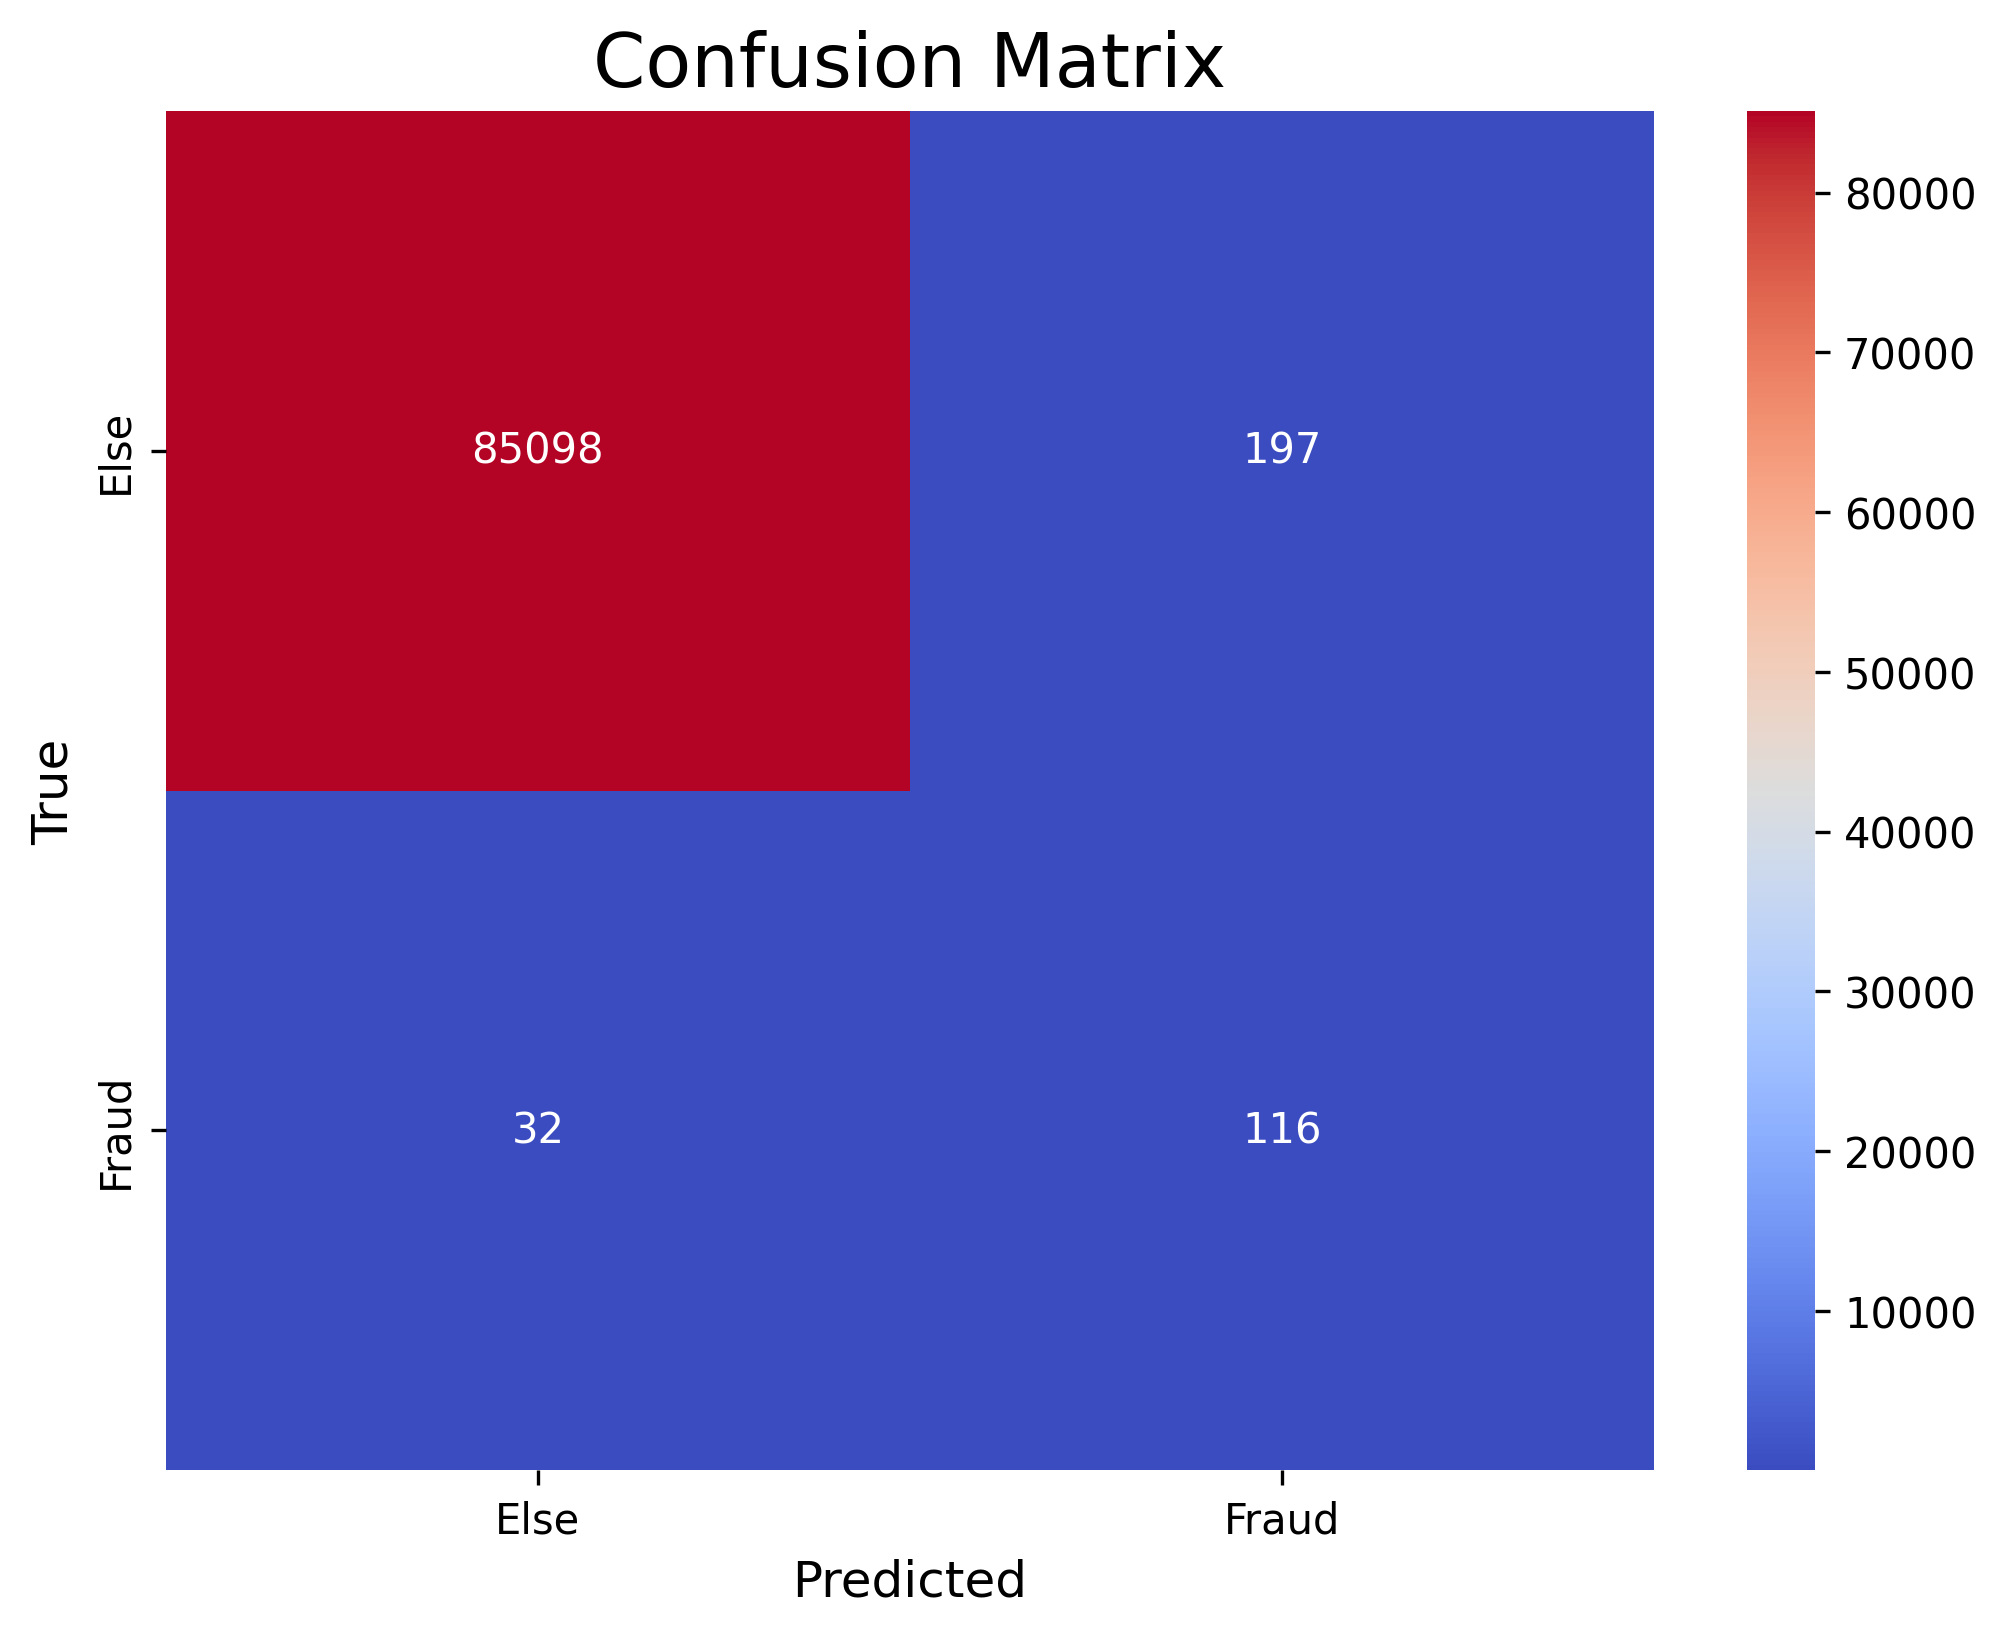

In [79]:
# Confusion Matrix
confusion_mat = confusion_matrix(all_labels, predictions_binary)
plt.figure(figsize=(8, 6), dpi=300)
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='coolwarm', 
            xticklabels=['Else', 'Fraud'], 
            yticklabels=['Else', 'Fraud'])
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [44]:
# SHAP分析
explainer = shap.Explainer(model, torch.tensor(X_test.values, dtype=torch.float32))
shap_values = explainer.shap_values(torch.tensor(X_test.values, dtype=torch.float32))
shap.summary_plot(shap_values, X_test)

TypeError: 'Tensor' object is not callable